In [22]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

In [ ]:
# Reading the CSV Data

diab_data = pd.read_csv("pima-indians-diabetes.csv")
print(diab_data.head())

### QUESTION-1

In [14]:
# REPLACING OUTLIERS BY MEDIAN

for attribute in diab_data.columns:
    
    # Ignoring Outlier Replacement for 'class'
    if attribute == 'class':
        continue
        
    q1 = np.quantile(diab_data[attribute], 0.25)
    q3 = np.quantile(diab_data[attribute],0.75)
    IQR = q3 - q1
    med = diab_data[attribute].median()
    
    for i in diab_data.index:
        val = diab_data.loc[i, attribute]
        if (val<(q1-(1.5*IQR))) or (val>(q3+(1.5*IQR))):
            diab_data.loc[i, attribute] = med
    
    # The DataFrame is now outlier-corrected
 
print(diab_data.head())

before_mean = pd.Series([diab_data[x].mean() for x in cols], index = cols)

   pregs  plas  pres  skin   test   BMI    pedi  Age  class
0      6   148    72    35    0.0  33.6  0.6270   50      1
1      1    85    66    29    0.0  26.6  0.3510   31      0
2      8   183    64     0    0.0  23.3  0.6720   32      1
3      1    89    66    23   94.0  28.1  0.1670   21      0
4      0   137    40    35  168.0  43.1  0.3725   33      1
pregs      3.782552
plas     121.656250
pres      72.108073
skin      20.437500
test      54.281738
BMI       32.107031
pedi       0.408996
Age       32.032552
dtype: float64


In [15]:
# Part (a): Min-Max Normalization in range 5 to 12

normalized_df = pd.DataFrame()

normal_max = 12
normal_min = 5
normal_range = normal_max - normal_min

for attribute in diab_data:
    
    if attribute == 'class':
        normalized_df[attribute] = diab_data[attribute]
        continue
        
    attribute_max = diab_data[attribute].max()
    attribute_min = diab_data[attribute].min()
    attribute_range = attribute_max - attribute_min
    
    normalized_df[attribute] = ((diab_data[attribute]-attribute_min) * (normal_range/attribute_range)) + normal_min

print(normalized_df.head())


      pregs       plas     pres      skin      test        BMI      pedi  \
0  8.230769   9.696774  8.50000  8.888889  5.000000   8.522876  9.070975   
1  5.538462   6.851613  7.84375  8.222222  5.000000   6.921569  7.024364   
2  9.307692  11.277419  7.62500  5.000000  5.000000   6.166667  9.404661   
3  5.538462   7.032258  7.84375  7.555556  7.550388   7.264706  5.659958   
4  5.000000   9.200000  5.00000  8.888889  9.558140  10.696078  7.183792   

      Age  class  
0  10.075      1  
1   6.750      0  
2   6.925      1  
3   5.000      0  
4   7.100      1  
pregs      3.782552
plas     121.656250
pres      72.108073
skin      20.437500
test      54.281738
BMI       32.107031
pedi       0.408996
Age       32.032552
dtype: float64


In [7]:
# Comparing Minimum and Maximum Values before and after normalization

cols = [c for c in diab_data.columns if c != 'class']

before_min = pd.Series([diab_data[x].min() for x in cols], index = cols)
after_min = pd.Series([normalized_df[x].min() for x in cols], index = cols)
before_max = pd.Series([diab_data[x].max() for x in cols], index = cols)
after_max = pd.Series([normalized_df[x].max() for x in cols], index = cols)

comparison_df = pd.DataFrame({"Minimum Before":before_min, "Minimum After": after_min, "Maximum Before":before_max, "Maximum After": after_max})
print(comparison_df)
                        

       Minimum Before  Minimum After  Maximum Before  Maximum After
pregs           0.000            5.0          13.000           12.0
plas           44.000            5.0         199.000           12.0
pres           38.000            5.0         106.000           12.0
skin            0.000            5.0          63.000           12.0
test            0.000            5.0         318.000           12.0
BMI            18.200            5.0          50.000           12.0
pedi            0.078            5.0           1.191           12.0
Age            21.000            5.0          66.000           12.0


In [8]:
# Part (b): Standardization

standard_df = pd.DataFrame()

for attribute in diab_data:
    
    if attribute == 'class':
        standard_df[attribute] = diab_data[attribute]
        continue
        
    attribute_mean = diab_data[attribute].mean()
    attribute_std = diab_data[attribute].std()
    
    standard_df[attribute] = (diab_data[attribute]-attribute_mean)/attribute_std

print(standard_df.head())

      pregs      plas      pres      skin      test       BMI      pedi  \
0  0.677985  0.865481 -0.017639  0.927633 -0.784682  0.218552  0.813064   
1 -0.850766 -1.204281 -0.555914  0.545432 -0.784682 -0.873396 -0.312721   
2  1.289485  2.015348 -0.735339 -1.301872 -0.784682 -1.388172  0.996616   
3 -0.850766 -1.072868 -0.555914  0.163232  0.426102 -0.639407 -1.063244   
4 -1.156516  0.504094 -2.888438  0.927633  1.379272  1.700483 -0.225024   

        Age  class  
0  1.559383      1  
1 -0.159236      0  
2 -0.068782      1  
3 -1.063773      0  
4  0.021671      1  


In [16]:
# Comparing Mean and Standard Deviations before and after

cols = [c for c in diab_data.columns if c != 'class']

before_mean = pd.Series([diab_data[x].mean() for x in cols], index = cols)
after_mean = pd.Series([standard_df[x].mean() for x in cols], index = cols)
before_std = pd.Series([diab_data[x].std() for x in cols], index = cols)
after_std = pd.Series([standard_df[x].std() for x in cols], index = cols)

comparison_df2 = pd.DataFrame({"Mean Before":before_mean, "Mean After": after_mean, "StD Before":before_std, "StD After": after_std})
print(comparison_df2)

       Mean Before    Mean After  StD Before  StD After
pregs     3.782552 -1.324172e-16    3.270644        1.0
plas    121.656250 -5.637851e-18   30.438286        1.0
pres     72.108073  4.840240e-16   10.874178        1.0
skin     20.437500 -1.445603e-19   15.698554        1.0
test     54.281738 -1.734723e-17   68.554835        1.0
BMI      32.107031  3.896839e-15    6.284780        1.0
pedi      0.408996  4.870236e-16    0.218380        1.0
Age      32.032552  1.937108e-16   10.082592        1.0


### QUESTION-2

In [18]:
# Generating the Data Matrix D

size = 1000
dim = 2

mean_values = [0, 0]
covariance_matrix = [[13, -3], [-3, 5]]

D = np.random.multivariate_normal(mean_values, covariance_matrix, size = (2, 1000))

print(D)

[[[-0.82793183  2.6592466 ]
  [-1.16818794 -0.65747701]
  [ 0.41136076  2.87971541]
  ...
  [ 3.44881786 -2.41776264]
  [ 2.87247977 -3.08768974]
  [-3.36988371 -0.53897027]]

 [[ 5.06283912 -1.84123554]
  [ 1.09751314  0.97008205]
  [ 6.77290501  0.79069669]
  ...
  [-6.96131502 -2.42615234]
  [ 4.02199202  1.2297555 ]
  [-5.20944998  2.52002317]]]


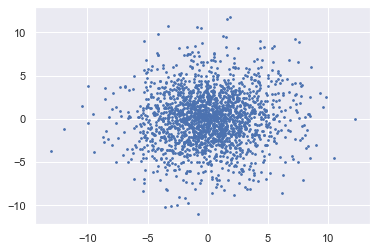

In [26]:
# Part a: Creating Scatter Plot of the Data Samples

plt.scatter(D[0], D[1], s = 3)
plt.show()

In [27]:
# Part b: Eigenvalues and eigenvectors of the covariance matrix

eigen_val, eigen_vec = np.linalg.eig(covariance_matrix)
print("Eigenvalues: ")
print(eigen_val)
print("-"*25)
print("Eigenvectors: ")
print(eigen_vec)

Eigenvalues: 
[14.  4.]
-------------------------
Eigenvectors: 
[[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]


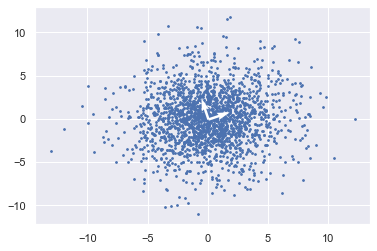

In [46]:
# Plotting Eigen directions onto the scatter plot

plt.scatter(D[0], D[1], s = 3)
# Plotting Arrows
plt.quiver(eigen_vec[0][0], eigen_vec[0][1], color = 'white', scale = 15)
plt.quiver(eigen_vec[1][0], eigen_vec[1][1], color = 'white', scale = 15)
plt.show()